In [ ]:
%pip install xgboost seaborn numpy pandas scikit-learn matplotlib

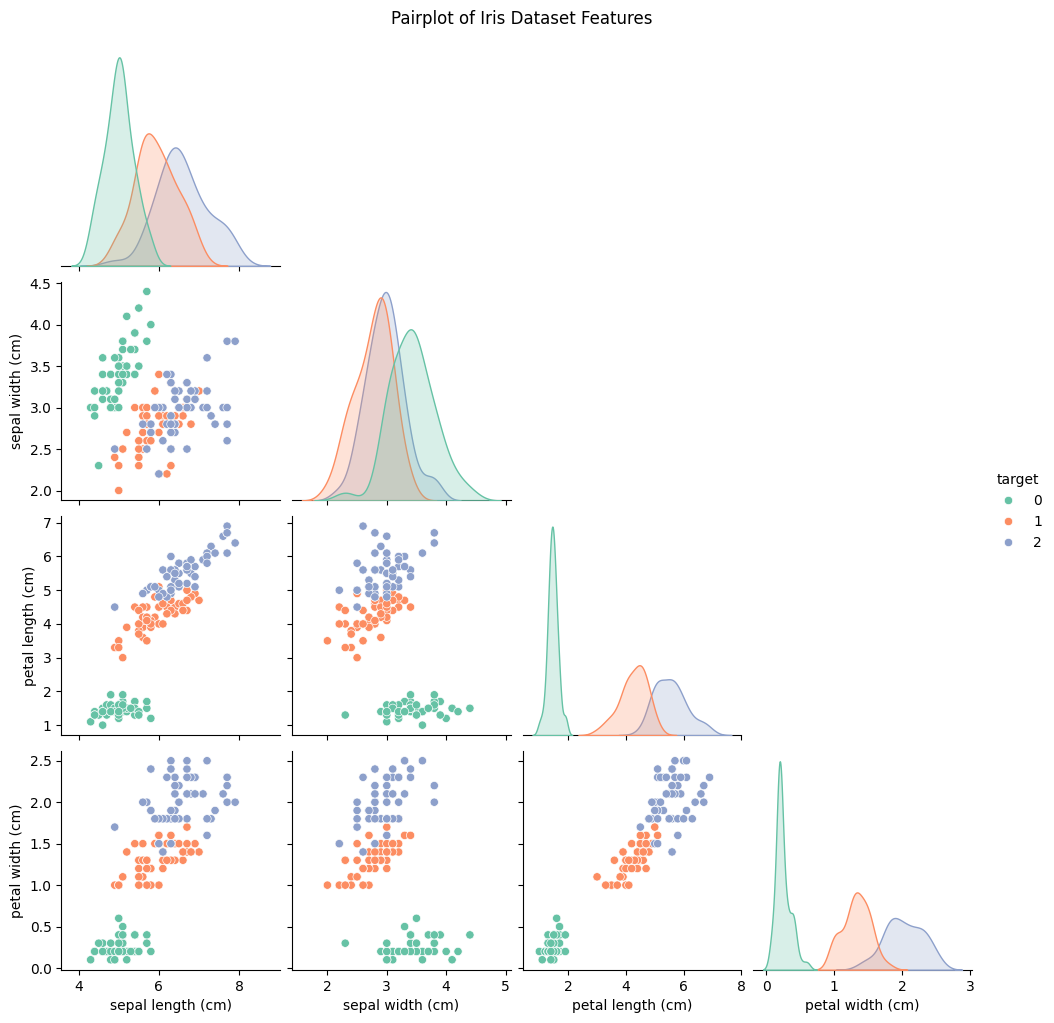

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Convert to a DataFrame for easier visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Pairplot visualization
sns.pairplot(df, hue='target', diag_kind='kde', palette='Set2', corner=True)
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()


In [10]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a DMatrix for training and testing
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,               # Number of classes in the target
    'max_depth': 4,               # Maximum depth of a tree
    'eta': 0.3,                   # Learning rate
    'eval_metric': 'merror'       # Evaluation metric
}

# Train the XGBoost model
num_rounds = 50  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 100.00%


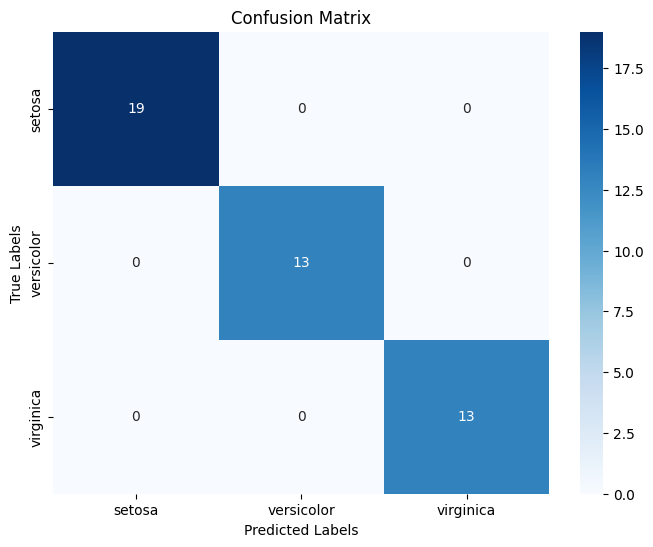

/tmp/ipykernel_3277/3157244752.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


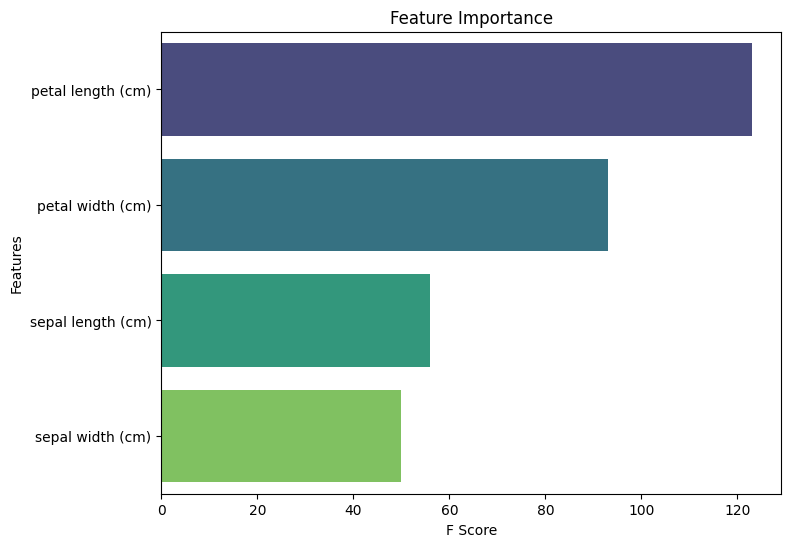

In [7]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Feature importance visualization
importance = bst.get_score(importance_type='weight')  # Get feature importance
importance_df = pd.DataFrame({
    'Feature': [feature_names[int(key[1:])] for key in importance.keys()],  # Map f0, f1, etc., to actual names
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('F Score')
plt.ylabel('Features')
plt.show()
